In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.stats
import statsmodels.api as sm

import sklearn as sk

pd.options.display.max_columns = 50
pd.options.mode.chained_assignment = None


In [61]:
# Major libraries
import scipy
import bottleneck # for speeding up pandas operations
import numexpr # ditto
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Mining / EDA / dimensionality reduction
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import scale
from scipy.spatial.distance import euclidean

# Supervised learning
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Unsupervised learning
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib.colors import ListedColormap

%matplotlib inline
rng = np.random.RandomState(1)

In [102]:
# read the file and create a pandas dataframe
data = pd.read_csv('D:/shweta/Re-admission/Diabetes_read/diabetic_data.csv')

In [103]:
# check the dimensions of the data
data.shape

(101766, 50)

In [104]:
#data type
#data.dtypes

In [105]:
# first 5 rows of data
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [106]:
data[['time_in_hospital','num_lab_procedures','num_procedures','num_medications',
        'number_outpatient','number_emergency','number_inpatient',
        'number_diagnoses']].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [107]:
#no of unique patient
len(np.unique(data['patient_nbr']))

71518

In [108]:
data = data.drop_duplicates(subset = 'patient_nbr', keep = 'first')

In [109]:
data['readmitted'] = pd.Series([0 if val in ['NO', '>30'] else  val 
                         for val in data['readmitted']], index=data.index)
data['readmitted'] = pd.Series([1 if val in ['<30'] else  val 
                         for val in data['readmitted']], index=data.index)

In [110]:
data.readmitted.value_counts()

0    65225
1     6293
Name: readmitted, dtype: int64

In [119]:
a=data.diag_1.value_counts()
a

414      5233
428      3980
786      3040
410      2902
486      2439
427      2053
715      1908
434      1581
682      1470
780      1421
491      1334
276      1204
996      1125
38       1116
250.8    1084
599       998
584       963
820       824
574       775
435       754
562       711
577       690
493       677
518       664
722       660
V57       659
296       635
250.6     634
433       616
440       613
         ... 
217         1
791         1
839         1
911         1
971         1
975         1
605         1
131         1
703         1
145         1
917         1
637         1
V25         1
366         1
684         1
114         1
804         1
160         1
691         1
299         1
923         1
57          1
939         1
982         1
833         1
V70         1
832         1
207         1
133         1
V66         1
Name: diag_1, Length: 697, dtype: int64

In [71]:
# remove irrelevant features
data.drop(['encounter_id','patient_nbr', 'weight', 'payer_code','max_glu_serum','A1Cresult'], axis=1, inplace=True)

In [72]:
# remove rows that have NA in 'race', 'diag_1', 'diag_2', or 'diag_3' and 'gender'
# remove rows that have invalid values in 'gender'
data = data[data['race'] != '?']
data = data[data['diag_1'] != '?']
data = data[data['diag_2'] != '?']
data = data[data['diag_3'] != '?']
data = data[data['gender'] != 'Unknown/Invalid']

In [73]:
# Recategorize 'age' so that the population is more evenly distributed
data['age'] = pd.Series(['[20-60)' if val in ['[20-30)', '[30-40)', '[40-50)', '[50-60)'] else val 
                         for val in data['age']], index=data.index)
data['age'] = pd.Series(['[60-100)' if val in ['[60-70)','[70-80)','[80-90)', '[90-100)'] else val 
                         for val in data['age']], index=data.index)

In [74]:
# remove the other medications
data.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone','insulin'], axis=1, inplace=True)

In [75]:
# Recategorize 'age' so that the population is more evenly distributed
data['discharge_disposition_id'] = pd.Series(['Home' if val in [1] else val 
                         for val in data['discharge_disposition_id']], index=data.index)

data['discharge_disposition_id'] = pd.Series(['Anather' if val in [2,3,4,5,6] else val 
                         for val in data['discharge_disposition_id']], index=data.index)

data['discharge_disposition_id'] = pd.Series(['Expired' if val in [11,19,20,21] else val 
                         for val in data['discharge_disposition_id']], index=data.index)

data['discharge_disposition_id'] = pd.Series(['NaN' if val in [18,25,26] else val
                         for val in data['discharge_disposition_id']], index=data.index)
                        
data['discharge_disposition_id'] = pd.Series(['other' if val in [7,8,9,10,12,13,14,15,16,17,22,23,24,27,28,29,30] else val 
                         for val in data['discharge_disposition_id']], index=data.index)

In [76]:
# original 'admission_source_id' contains 25 levels
# reduce 'admission_source_id' into 3 categories
data['admission_source_id'] = pd.Series(['Emergency Room' if val == 7 else 'Referral' if val in [1,2,3] else 
                                         'NaN' if val in [15,17,20,21] else 'Other source' 
                                              for val in data['admission_source_id']], index=data.index)

In [77]:
# original 'admission_type_id' contains 8 levels
# reduce 'admission_type_id' into 2 categories
data['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other type' 
                                              for val in data['admission_type_id']], index=data.index)

In [78]:
# Extract codes related to heart disease
data = data.loc[data['diag_1'].isin(['410','411','412','413','414','415','420','421','422','423','424','425','426','427','428','429','430']) | data['diag_2'].isin(['410','411','412','413','414','415','420','421','422','423','424','425','426','427','428','429','430']) | data['diag_3'].isin(['410','411','412','413','414','415','420','421','422','423','424','425','426','427','428','429','430'])]


In [79]:
data.shape

(26703, 21)

In [80]:
#data type
data.dtypes

race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
change                      object
diabetesMed                 object
readmitted                   int64
dtype: object

In [81]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted
5,Caucasian,Male,[20-60),Other type,Home,Referral,3,?,31,6,16,0,0,0,414,411,250,9,No,Yes,0
6,Caucasian,Male,[60-100),Other type,Home,Referral,4,?,70,1,21,0,0,0,414,411,V45,7,Ch,Yes,0
7,Caucasian,Male,[60-100),Emergency,Home,Emergency Room,5,?,73,0,12,0,0,0,428,492,250,8,No,Yes,0
8,Caucasian,Female,[60-100),Other type,Home,Other source,13,?,68,2,28,0,0,0,398,427,38,8,Ch,Yes,0
12,Caucasian,Female,[20-60),Emergency,Anather,Emergency Room,7,Family/GeneralPractice,60,0,15,0,1,0,428,250.43,250.6,8,Ch,Yes,1


In [82]:
import random
#create variable emergency visits
data['emergency_visits'] = [random.randint(0, 5) for _ in range(26703)]

In [83]:
#create variable emergency visits
data['acuity_of_admission'] = [random.randint(1, 5) for _ in range(26703)]

In [84]:
#create variable emergency visits
data['comorbidity'] = [random.randint(1, 15) for _ in range(26703)]

In [85]:
data["age"] = data["age"].astype('category')
data["race"] = data["race"].astype('category')
data["gender"] = data["gender"].astype('category')
data["medical_specialty"] = data["medical_specialty"].astype('category')
data["change"] = data["change"].astype('category')
data["diabetesMed"] = data["diabetesMed"].astype('category')
data["discharge_disposition_id"] = data["discharge_disposition_id"].astype('category')
data["admission_source_id"] = data["admission_source_id"].astype('category')
data["admission_type_id"] = data["admission_type_id"].astype('category')
data["diag_1"] = data["diag_1"].astype('category')
data["diag_2"] = data["diag_2"].astype('category')
data["diag_3"] = data["diag_3"].astype('category')

In [86]:
data["age1"] = data["age"].cat.codes
data["race1"] = data["race"].cat.codes
data["gender1"] = data["gender"].cat.codes
data["medical_specialty1"] = data["medical_specialty"].cat.codes
data["change1"] = data["change"].cat.codes
data["diabetesMed1"] = data["diabetesMed"].cat.codes
data["discharge_disposition_id1"] = data["discharge_disposition_id"].cat.codes
data["admission_source_id1"] = data["admission_source_id"].cat.codes
data["admission_type_id1"] = data["admission_type_id"].cat.codes
data["diag_11"] = data["diag_1"].cat.codes
data["diag_21"] = data["diag_2"].cat.codes
data["diag_31"] = data["diag_3"].cat.codes



data.drop(['age', 'medical_specialty', 'race', 'gender','change', 
                  'diabetesMed', 'discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id', 'diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)



In [87]:
# apply square root transformation on right skewed count data to reduce the effects of extreme values.
# here log transformation is not appropriate because the data is Poisson distributed and contains many zero values.
data['number_outpatient'] = data['number_outpatient'].apply(lambda x: np.sqrt(x + 0.5))
data['number_emergency'] = data['number_emergency'].apply(lambda x: np.sqrt(x + 0.5))
data['number_inpatient'] = data['number_inpatient'].apply(lambda x: np.sqrt(x + 0.5))

In [88]:
# feature scaling, features are standardized to have zero mean and unit variance
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[feature_scale_cols])
data_scaler = scaler.transform(data[feature_scale_cols])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=data.index)
data.drop(feature_scale_cols, axis=1, inplace=True)
data = pd.concat([data, data_scaler_df], axis=1)

In [89]:
# create X (features) and y (response)
X = data.drop(['readmitted'], axis=1)
y = data['readmitted']

In [90]:
# split X and y into cross-validation (75%) and testing (25%) data sets
from sklearn.cross_validation import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.25)

Top 10 features are: 
num_lab_procedures
num_medications
diag_31
diag_21
diag_11
comorbidity
time_in_hospital
emergency_visits
acuity_of_admission
medical_specialty1


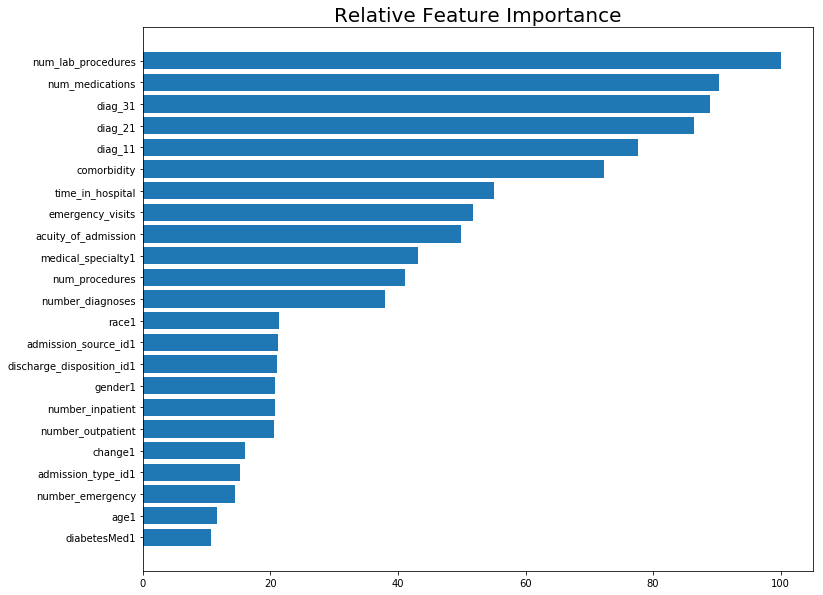

In [91]:
# fit Random Forest model to the cross-validation data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_cv, y_cv)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_cv.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print(feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

In [94]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf =  RandomForestClassifier()

In [95]:
#regular logistic regression Method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,  random_state=55)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc3 = rf.score(X_test, y_test)
acc3

0.90675321433029588

In [96]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

-0.00076225082400172006

In [97]:
#data Preparation
X1 = X
y1 = y
data = pd.concat([X,y], axis = 1)
df = Counter(y)
c = min(y, key=df.get)
d = [i for i,x in enumerate(y) if x == c]  #row index having rare class
d1 = [i for i,x in enumerate(y) if x != c]
Rare_Class_data = data.iloc[d]
Mejor_Class_data = data.iloc[d1]

In [98]:
df = Rare_Class_data
a=Rare_Class_data.shape[0]
b = Mejor_Class_data.shape[0]
n = round(b/a)
sm = SMOTE(random_state=12, ratio = 1.0)
rf =  RandomForestClassifier()

acc1=0
acc2=0

In [99]:
 for i in range(1,n):
             df1 = Rare_Class_data.copy()
             df = data.append(df1)
             data = df
             n=df.shape[1]
             X1=df.iloc[:,1:(n-2)]
             y1=df.iloc[:,(n-1)]
             
             X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = .3,random_state=i)
             X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
             rf.fit(X_train_res, y_train_res)
             y_pred = rf.predict(X_test)
             acc1 = rf.score(X_test, y_test)

C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, catego

In [100]:
acc1     # SMOTE method

0.9936613958560524

In [101]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.98731947083350791

In [26]:

import datetime;
a=datetime.datetime.strptime("2003-3-25", '%Y-%m-%d')
date = [(a - datetime.timedelta(days=x)).strftime('%Y-%m-%d') for x in range(-5000, 0)]


In [27]:
ss=np.random.choice(date, 26703)
ss.shape
ss

array(['2016-02-29', '2013-11-15', '2008-07-19', ..., '2006-09-30',
       '2016-02-11', '2004-04-07'],
      dtype='<U10')

In [28]:
data.shape

(26703, 24)

In [29]:
#create variable emergency visits
data['date'] = ss

In [30]:
data.head()          

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted,emergency_visits,acuity_of_admission,comorbidity,date
5,Caucasian,Male,[20-60),Other type,Home,Referral,3,?,31,6,16,0,0,0,414,411,250,9,No,Yes,0,3,1,3,2016-02-29
6,Caucasian,Male,[60-100),Other type,Home,Referral,4,?,70,1,21,0,0,0,414,411,V45,7,Ch,Yes,0,5,1,11,2013-11-15
7,Caucasian,Male,[60-100),Emergency,Home,Emergency Room,5,?,73,0,12,0,0,0,428,492,250,8,No,Yes,0,3,1,7,2008-07-19
8,Caucasian,Female,[60-100),Other type,Home,Other source,13,?,68,2,28,0,0,0,398,427,38,8,Ch,Yes,0,3,2,11,2005-09-24
12,Caucasian,Female,[20-60),Emergency,Anather,Emergency Room,7,Family/GeneralPractice,60,0,15,0,1,0,428,250.43,250.6,8,Ch,Yes,1,0,1,11,2010-09-21


In [31]:
# read the file and create a pandas dataframe
data7 = pd.read_csv('E:/xyz22.csv')
data7.head()

,date,admission_source_id,lenght_of_stay,medical_specialty,num_lab_procedures,num_procedures,number_outpatient,number_inpatient,diag_1,diag_2,diag_3,readmitted,emergency_visits,acuity_of_admission,comorbidity
0,2003-03-26,Referral,3,?,31,6,0,0,414,411,250,0,4,1,14
1,2003-03-26,Referral,4,?,70,1,0,0,414,411,V45,0,1,3,12
2,2003-03-26,Emergency Room,5,?,73,0,0,0,428,492,250,0,0,4,10
3,2003-03-26,Other source,13,?,68,2,0,0,398,427,38,0,5,5,1
4,2003-03-26,Emergency Room,7,Family/GeneralPractice,60,0,0,0,428,250.43,250.6,1,3,5,8


In [32]:
from scipy.stats import mode

In [55]:
data7.index = data7['date'] 

In [57]:
# Group the data frame by month and item and extract a number of stats from each group
d1=data7.resample('M').agg({'admission_source_id':'last',      
                                     'lenght_of_stay': 'mean', 
                             'medical_specialty':'last',
                              'num_lab_procedures':'last',
                              'num_procedures':'last',
                              'number_outpatient':sum,
                              'number_inpatient':'sum',
                             'diag_1':'last',
                              'diag_2':'last',
                              'diag_3':'last',
                              'readmitted':'last',
                              'emergency_visits':'last',
                              'acuity_of_admission':'last',
                              'comorbidity':'last'}) 

In [58]:
d1.head()

,admission_source_id,lenght_of_stay,medical_specialty,num_lab_procedures,num_procedures,number_outpatient,number_inpatient,diag_1,diag_2,diag_3,readmitted,emergency_visits,acuity_of_admission,comorbidity
date,,,,,,,,,,,,,,
2003-03-31,Emergency Room,4.714286,?,59,0,3,5,564,414,794,0,5,3,1
2003-04-30,Emergency Room,4.790210,Family/GeneralPractice,51,0,5,15,428,250.02,401,0,5,1,9
2003-05-31,Emergency Room,4.791946,InternalMedicine,46,4,5,24,428,411,424,0,2,3,11
2003-06-30,Emergency Room,5.119497,?,46,6,2,21,414,411,424,0,2,4,7
2003-07-31,Emergency Room,4.815642,?,69,1,16,35,428,707,416,0,4,4,11


In [59]:
d1.shape

(166, 14)

In [243]:
d.to_csv('E:/xy.csv')

In [153]:
data["age"] = data["age"].astype('category')
data["race"] = data["race"].astype('category')
data["gender"] = data["gender"].astype('category')
data["medical_specialty"] = data["medical_specialty"].astype('category')
data["change"] = data["change"].astype('category')
data["diabetesMed"] = data["diabetesMed"].astype('category')
data["discharge_disposition_id"] = data["discharge_disposition_id"].astype('category')
data["admission_source_id"] = data["admission_source_id"].astype('category')
data["admission_type_id"] = data["admission_type_id"].astype('category')
data["diag_1"] = data["diag_1"].astype('category')
data["diag_2"] = data["diag_2"].astype('category')
data["diag_3"] = data["diag_3"].astype('category')

In [154]:
data["age1"] = data["age"].cat.codes
data["race1"] = data["race"].cat.codes
data["gender1"] = data["gender"].cat.codes
data["medical_specialty1"] = data["medical_specialty"].cat.codes
data["change1"] = data["change"].cat.codes
data["diabetesMed1"] = data["diabetesMed"].cat.codes
data["discharge_disposition_id1"] = data["discharge_disposition_id"].cat.codes
data["admission_source_id1"] = data["admission_source_id"].cat.codes
data["admission_type_id1"] = data["admission_type_id"].cat.codes
data["diag_11"] = data["diag_1"].cat.codes
data["diag_21"] = data["diag_2"].cat.codes
data["diag_31"] = data["diag_3"].cat.codes



data.drop(['age', 'medical_specialty', 'race', 'gender','change', 
                  'diabetesMed', 'discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id', 'diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)



In [29]:
# apply square root transformation on right skewed count data to reduce the effects of extreme values.
# here log transformation is not appropriate because the data is Poisson distributed and contains many zero values.
data['number_outpatient'] = data['number_outpatient'].apply(lambda x: np.sqrt(x + 0.5))
data['number_emergency'] = data['number_emergency'].apply(lambda x: np.sqrt(x + 0.5))
data['number_inpatient'] = data['number_inpatient'].apply(lambda x: np.sqrt(x + 0.5))

In [30]:
# feature scaling, features are standardized to have zero mean and unit variance
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[feature_scale_cols])
data_scaler = scaler.transform(data[feature_scale_cols])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=data.index)
data.drop(feature_scale_cols, axis=1, inplace=True)
data = pd.concat([data, data_scaler_df], axis=1)

In [31]:
# create X (features) and y (response)
X = data.drop(['readmitted'], axis=1)
y = data['readmitted']

In [32]:
# split X and y into cross-validation (75%) and testing (25%) data sets
from sklearn.cross_validation import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.25)

Top 10 features are: 
num_lab_procedures
diag_31
diag_11
num_medications
diag_21
comorbidity
time_in_hospital
emergency_visits
acuity_of_admission
number_diagnoses


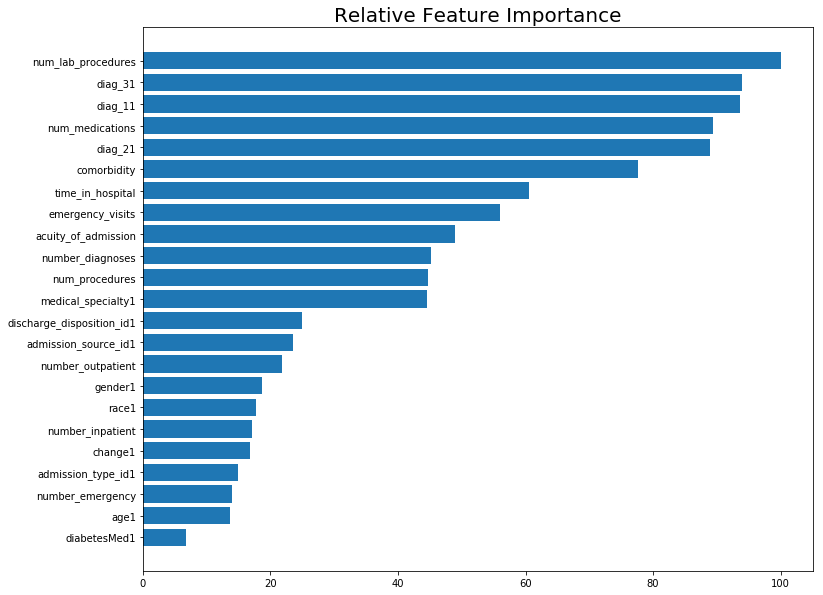

In [33]:
# fit Random Forest model to the cross-validation data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_cv, y_cv)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_cv.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print(feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [35]:
#data Preparation
X1 = X
y1 = y
data = pd.concat([X,y], axis = 1)
df = Counter(y)
c = min(y, key=df.get)
d = [i for i,x in enumerate(y) if x == c]  #row index having rare class
d1 = [i for i,x in enumerate(y) if x != c]
Rare_Class_data = data.iloc[d]
Mejor_Class_data = data.iloc[d1]

In [36]:
df = Rare_Class_data
a=Rare_Class_data.shape[0]
b = Mejor_Class_data.shape[0]
n = round(b/a)
sm = SMOTE(random_state=12, ratio = 1.0)
rf =  RandomForestClassifier()

acc1=0
acc2=0

In [37]:
 for i in range(1,n):
             df1 = Rare_Class_data.copy()
             df = data.append(df1)
             data = df
             n=df.shape[1]
             X1=df.iloc[:,1:(n-2)]
             y1=df.iloc[:,(n-1)]
             
             X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = .3,random_state=i)
             X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
             rf.fit(X_train_res, y_train_res)
             y_pred = rf.predict(X_test)
             acc1 = rf.score(X_test, y_test)

C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, catego

# ...Random forest using SMOTE method

In [38]:
acc1     # SMOTE method

0.9942066521264995

In [39]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.98841040862621266

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7255
          1       0.99      1.00      0.99      7417

avg / total       0.99      0.99      0.99     14672



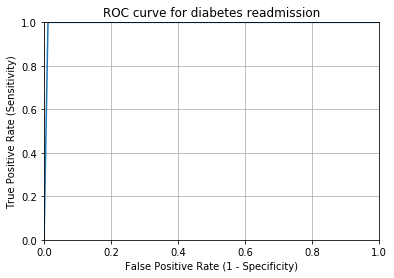

In [41]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes readmission')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# ...Random forest using Random over sampling method

In [42]:
#Random over sampling method
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc2 = rf.score(X_test, y_test)
print(acc2)

0.995637949836


In [43]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, y_pred))

0.991273995309


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00      7255
          1       0.99      1.00      1.00      7417

avg / total       1.00      1.00      1.00     14672



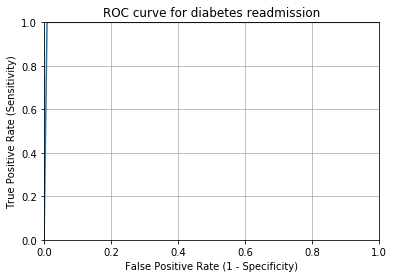

In [45]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes readmission')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# ...Regular Random forest Method

In [77]:
#regular logistic regression Method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,  random_state=i)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc3 = rf.score(X_test, y_test)
acc3

0.90687804269129946

In [78]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.00045493120336337345

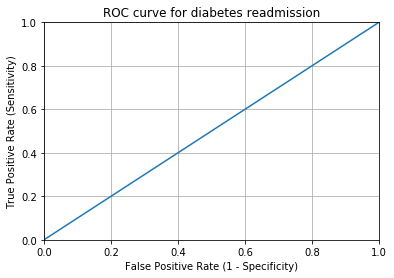

In [79]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes readmission')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95      7272
          1       0.11      0.00      0.00       739

avg / total       0.83      0.91      0.86      8011



In [46]:
####Prediction on new data
new=data[500:575]

# create a (features) and b (response)
p = new.drop(['readmitted'], axis=1)
q = new['readmitted']

In [49]:
new.shape

(75, 24)

In [50]:
data.shape

(48906, 24)

In [58]:
#y_pred_new = rf.predict(p)

In [59]:
y_pred_new

NameError: name 'y_pred_new' is not defined

In [54]:
np.array(q)

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)